# Final Data Analysis



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Cleaning the Data

In [2]:
data_1 = "1429_1.csv"
df = pd.read_csv(data_1)

data1 = "Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv"
df1 = pd.read_csv(data1, header = 0)

data2= "Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv"
df2 = pd.read_csv(data2, header = 0)

df = df.drop(["asins", "keys","manufacturer", "reviews.didPurchase", "reviews.id", "reviews.sourceURLs", "reviews.userCity", "reviews.userProvince", "reviews.numHelpful" ], axis = 1)

df.columns = ["ID", "Name", "Brand", "Category", "Review Date", "Date Added", "Date Seen", "Recommendation", "Rating", "Review", "Review Title", "Username"]
df = df.drop("Date Added", axis = 1)


new_name = []
data1 = "Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv"

df1 = pd.read_csv(data1, header = 0)
data2= "Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv"
df2 = pd.read_csv(data2, header = 0)
cols = ['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 
       'reviews.dateSeen', 'reviews.dateAdded', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs']
        
df1.columns = cols
df2.columns = cols
combined_data = pd.concat([df1, df2])

combined_data = combined_data.drop(["asins", "keys","manufacturer", "reviews.id", "imageURLs", "manufacturerNumber", "dateUpdated", "primaryCategories", "reviews.numHelpful", "sourceURLs", "reviews.sourceURLs" ], axis = 1)
combined_data.columns = ["ID","Date Added", "Name", "Brand", "Category", "Review Date" , "Date Seen","Date Added", "Recommendation", "Rating", "Review", "Review Title", "Username"]
combined_data = combined_data[["ID", "Name", "Brand", "Category","Review Date", "Date Added", "Date Seen", "Recommendation", "Rating", "Review", "Review Title", "Username"]]
combined_data = combined_data.drop("Date Added", axis = 1)

full_data = pd.concat([df, combined_data])
full_data = full_data.drop("Date Seen", axis = 1)
full_data = full_data.reset_index()
full_data = full_data.drop_duplicates(subset='Review', keep='first')
full_data['Review Date'] = full_data['Review Date'].astype(str).str[0:10]
full_data['Review Date']=pd.to_datetime(full_data['Review Date'])
full_data['Review Date'] = full_data['Review Date'].dt.strftime('%m/%Y')
full_data = full_data.dropna(how = "any", axis = 0)
new_name= full_data["Name"].str.split(",", n = 1, expand = True)
full_data["Name"] = new_name[0]
full_data = full_data.rename(columns={"Name": "Product Name"})
full_data["Product Name"]= full_data["Product Name"].replace({'Kindle Oasis E-reader with Leather Charging Cover - Merlot': 'Kindle Oasis E-reader with Leather Charging Cover', 'Amazon - Kindle Voyage - 4GB - Wi-Fi + 3G - Black': 'Amazon - Kindle Voyage', 'All-New Kindle Oasis E-reader - 7 High-Resolution Display (300 ppi)': 'All-New Kindle Oasis E-reader - 7', 'Amazon - Kindle Voyage - 4GB - Wi-Fi + 3G - Black': 'Amazon - Kindle Voyage', "Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black":"Amazon Kindle Paperwhite",
                                                              "Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders":"Amazon Charger for Fire and Kindle","Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black":"Amazon Tap Bluetooth and Wi-Fi Speaker",
                                                              "Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders":"PowerFast USB Charger for Fire and Kindle","Amazon Fire Hd 8 8in Tablet 16gb Black B018szt3bk 6th Gen (2016) Android":"Amazon Fire Hd 8in Tablet Black Gen 6",
                                                              "Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16":"Amazon Kindle Fire 7' Display Tablet", 'Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7" Screen': 'Amazon Echo with 7" Screen', 'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue' : 'Amazon Kindle Fire 7"'})
data = full_data
data.head()

/Users/matthewrichtmyer/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,index,ID,Product Name,Brand,Category,Review Date,Recommendation,Rating,Review,Review Title,Username
0,0,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",01/2017,True,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,1,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",01/2017,True,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,2,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",01/2017,True,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,3,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",01/2017,True,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,4,AVqkIhwDv8e3D1O-lebb,All-New Fire HD 8 Tablet,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",01/2017,True,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


# Data Analysis
- Trends with Product Ratings
- Temporal Trends with Ratings
- Topic Modeling

## Trends with Product Ratings

### Distribution of Ratings for All Products in Dataset.

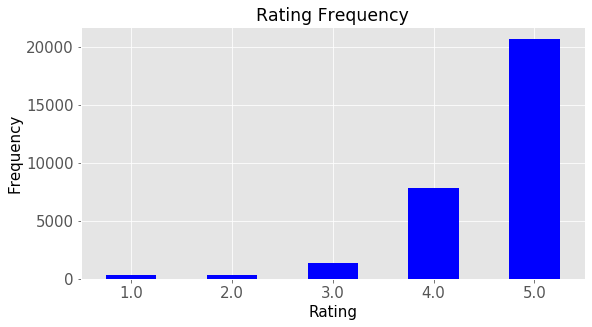

In [3]:
# groupby "Rating" and make a list of each group
data_1 = data.groupby("Rating")
rating= data_1["Rating"].count()
# Print list
rating
# Create a bar chart of frequency of rating of each type
#set ggplot style
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
ax = rating.plot.bar(x='Rating', color = 'b', rot=0)
plt.rcParams.update({'font.size':12})
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.xlabel('xlabel', color= 'black', fontsize=15)
plt.ylabel('ylabel', color='black',fontsize=15)
ax.set_title('Rating Frequency')
ax.set_ylabel('Frequency')
ax.set_xlabel('Rating')
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)
plt.savefig("../Results/Rating Frequency.png")

### Average Product Review for Top 20 Products

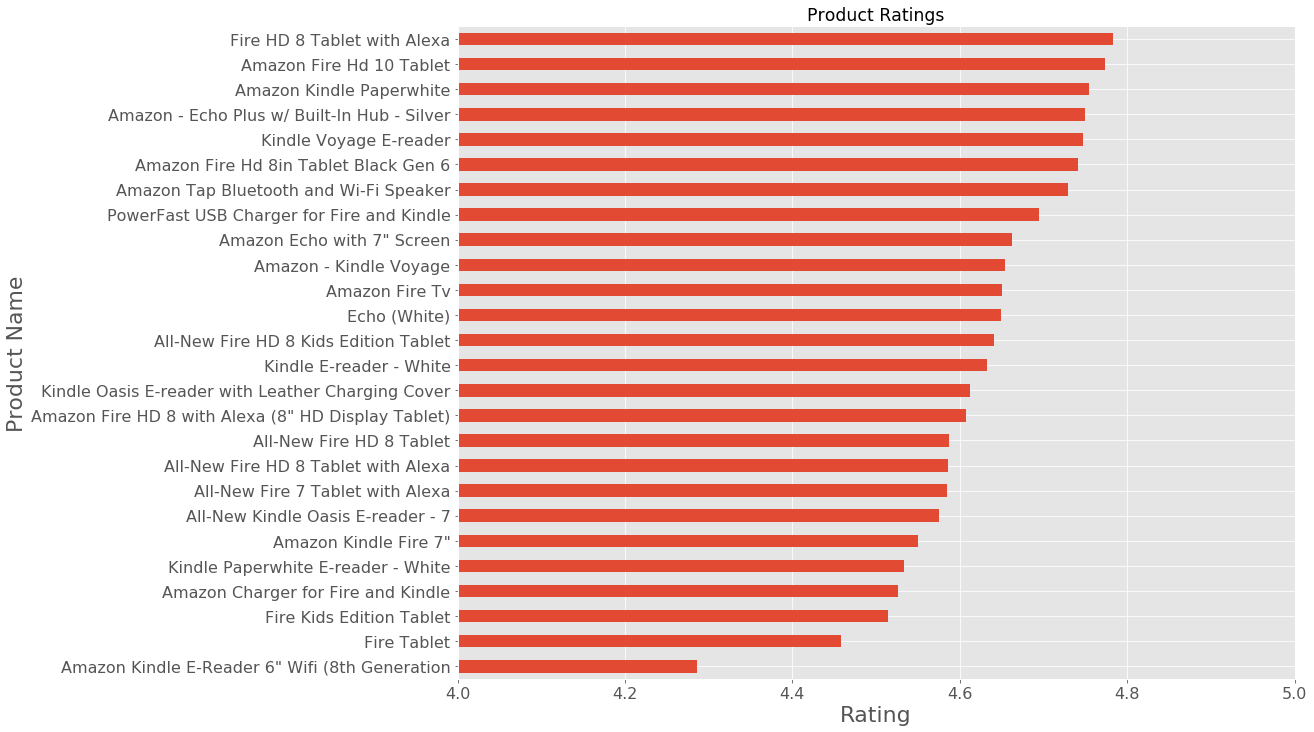

In [4]:
#groupby using the product name
fd_gb = full_data.groupby("Product Name")
#getting the mean for the rating using the grouped by dataset
mean_fb = fd_gb["Rating"].mean()
#counting how many reviews per product
count_review= fd_gb["Review"].count()
#creating a new dataframe using the Review Count and the Average Rating
new_df = pd.DataFrame({
                      "Average Rating": mean_fb, "Review Count": count_review })
#sorting values using the Average Rating to get he highest rating first
new_df = new_df.sort_values(by="Average Rating", ascending=True)
#only counting reviews with over 10 reviews
new_df["Review Count"] = new_df["Review Count"].loc[new_df["Review Count"] > 10]
#dropping all the reviews that has less than 10 reviews
new_df = new_df.dropna(how = "any", axis = 0)
#activating seaborn
#sns.set()
#create the graph using a horizontal graph
ax = new_df["Average Rating"].plot(kind = "barh", title = "Product Ratings", fontsize = 16, figsize = (15,12))
#setting a xlabel
ax.set_xlabel("Rating", fontsize = 22)
#setting the ylabel
ax.set_ylabel("Product Name", fontsize = 22)
#saving the figure
ax.set_xlim(4,5)
ax.figure.savefig('../Results/product_ratings.png', bbox_inches = "tight")

### Distribution of Recommendations

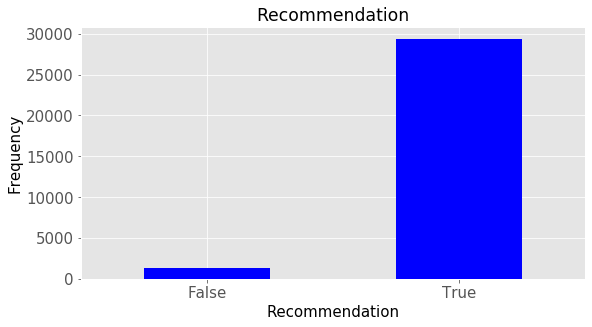

In [5]:
# make a list of "Recommendation" types and their frequency 
#set ggplot style
plt.style.use('ggplot')
data_2 = data.groupby("Recommendation")
rec= data_2["Recommendation"].count()
# Print List
rec
# bar chart visualization of types recommendations and their frequescy
plt.figure(figsize=(10,5))
ax = rec.plot.bar(x='Recommendation', color = 'blue', rot=0)
plt.rcParams.update({'font.size':12})
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.xlabel('xlabel', color= 'black', fontsize=15)
plt.ylabel('ylabel', color='black',fontsize=15)
ax.set_title('Recommendation')
ax.set_ylabel('Frequency')
ax.set_xlabel('Recommendation')
plt.savefig("../Results/Recommendation.png")
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)
#plt.grid(True)

## Temporal Trends with Ratings

###  Distribution of Number of Reviews Per Year

In [6]:
rec

Recommendation
False     1269
True     29376
Name: Recommendation, dtype: int64

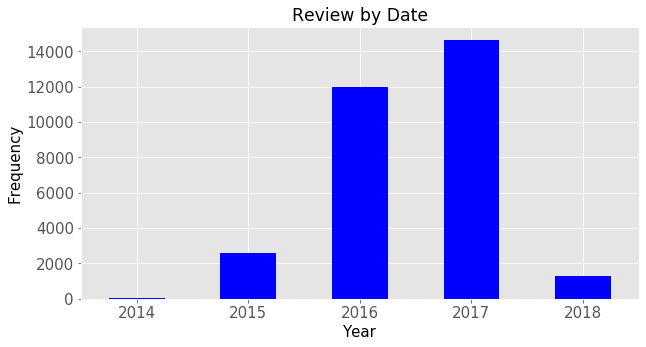

In [7]:
#Extract Year only from the column Review Date
data['Year'] = pd.DatetimeIndex(data['Review Date']).year
data['Year'] = data['Year'].astype(str).str[0:4]
data['Year']
# Groupby the review dates by year
#set ggplot style
#plt.style.use('ggplot')
data_2 = data.groupby("Year")
rec= data_2["Year"].count()
rec
#Calculate and plot the total review each year
plt.figure(figsize=(10,5))
ax = rec.plot(kind = "bar", color = 'blue')
#ax = rec.plot.bar(x='Year', rot='vertical')
plt.rcParams.update({'font.size':12})
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.xlabel('xlabel', color= 'black', fontsize=15)
plt.ylabel('ylabel', color='black',fontsize=15)
ax.set_title('Review by Date')
ax.set_ylabel('Frequency')
ax.set_xlabel('Year')
plt.xticks(rotation= 0)
plt.savefig("../Results/Frequency of Yearly Review.png")

### Mean Ratings Per Year

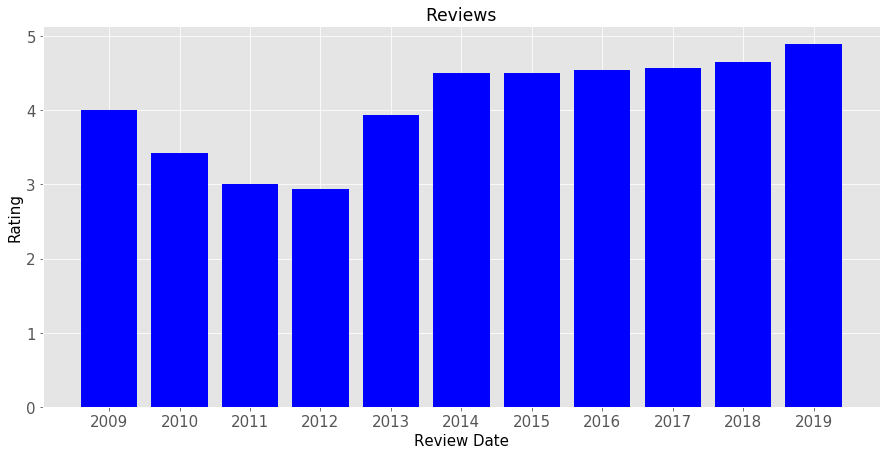

In [8]:
#read data from csv
data = pd.read_csv('amazon_trends_final.csv', usecols=['Review Date','Rating'], parse_dates=['Review Date'])
data = data.dropna() #important
# sort review dates by year
#data['year'] = data['Review Date']
data['year'] = data['Review Date'].apply(lambda x: x.strftime('%Y'))
#calculate the mean rating grouped by year
data_new = data.groupby('year', as_index=False).Rating.mean()

#set date as index
data_new.set_index('year',inplace=True)

# plot a graph comparing review dates to frequescy of ratings each year
#set ggplot style
plt.style.use('ggplot')
#plot data
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(data_new.index, data_new['Rating'], color = 'blue')
# Plot title and labels
plt.rcParams.update({'font.size':12})
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.xlabel('xlabel', color= 'black', fontsize=15)
plt.ylabel('ylabel', color='black',fontsize=15)
ax.set_title('Reviews')
ax.set_ylabel('Rating')
ax.set_xlabel('Review Date')
plt.savefig("../Results/Reviews vs Rating.png")

In [9]:
#data["Review Date"].head()
type(data["Review Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

# Plot Brand Distributions

In [10]:
# read in each csv and only pull brand and reviews.rating columns

data = "../1429_1.csv"
df = pd.read_csv(data)
df = df[["brand", "reviews.rating"]]

data1 = "../Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv"
df1 = pd.read_csv(data1, header = 0)
df1 = df1[["brand", "reviews.rating"]]

data2= "../Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv"
df2 = pd.read_csv(data2, header = 0)
df2 = df2[["brand", "reviews.rating"]]

# concatenate all three dataframes and reset index
combined = pd.concat([df, df1, df2])
combined = combined.dropna(how="any")
combined = combined.reset_index()

/Users/matthewrichtmyer/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
# pull subsets of data that correspond to respective brands
echo = combined.loc[ combined["brand"]=="Amazon Echo", :]
fire = combined.loc[ combined["brand"]=="Amazon Fire", :]
basics = combined.loc[ (combined["brand"]=="Amazonbasics") | (combined["brand"]=="AmazonBasics")]
# do groupby with counting aggregate methods
echo_gb = echo.groupby("reviews.rating").count()
fire_gb = fire.groupby("reviews.rating").count()
basics_gb = basics.groupby("reviews.rating").count()

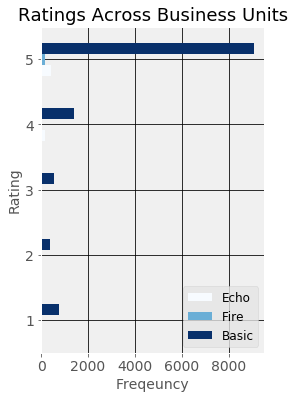

In [28]:
from matplotlib import cm 
# import colormaps for cool colors
cmap = cm.get_cmap('Blues')

# make dataframe
business_units = pd.DataFrame({"Echo":echo_gb["index"].values, "Fire": fire_gb["index"].values, "Basic": basics_gb["index"].values},
                             index=["1","2","3","4","5"])

# plot horizontal bar graphs
ax = business_units.plot(kind="barh", cmap=cmap, figsize=(4,6))
ax.set_facecolor('#F0F0F0')
# title
plt.title("Ratings Across Business Units",fontsize=18)
# x axis
plt.xlabel("Freqeuncy",fontsize=14)
plt.xticks(fontsize=14,rotation=0)
# y axis
plt.ylabel("Rating",fontsize=14)
plt.yticks(fontsize=14)


ax.grid(b=True, which='major', color='k', linestyle='-')


plt.savefig("../Results/Ratings-Business-Units.png")